In [3]:
## 01. 데이터 수집 및 로딩
# pandas 등 라이브러리 로드 및 CSV 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
import matplotlib.font_manager as fm

font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
matplotlib.rc('font', family=font_name)
plt.rc('axes', unicode_minus=False)

df_2015 = pd.read_csv('data/2015.csv')
df_2019 = pd.read_csv('data/2019.csv')

In [4]:
## 02. 데이터 구조 확인
# 데이터 크기 및 컬럼 확인
print(df_2015.shape)
print(df_2019.shape)
print(df_2015.columns)
print(df_2019.columns)

(158, 12)
(156, 9)
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


In [5]:
## 03. 컬럼명 정리 및 병합
# 컬럼명을 통일하고 데이터 병합
df_2015 = df_2015.rename(columns={
    'Country': 'Country',
    'Happiness Score': 'Score_2015',
    'Economy (GDP per Capita)': 'GDP_2015',
    'Family': 'Family_2015',
    'Health (Life Expectancy)': 'Health_2015',
    'Freedom': 'Freedom_2015',
    'Trust (Government Corruption)': 'Corruption_2015',
    'Generosity': 'Generosity_2015'
})
[['Country', 'Score_2015', 'GDP_2015', 'Family_2015', 'Health_2015', 'Freedom_2015', 'Corruption_2015', 'Generosity_2015']]

[['Country',
  'Score_2015',
  'GDP_2015',
  'Family_2015',
  'Health_2015',
  'Freedom_2015',
  'Corruption_2015',
  'Generosity_2015']]

In [6]:
df_2019 = df_2019.rename(columns={
    'Country or region': 'Country',
    'Score': 'Score_2019',
    'GDP per capita': 'GDP_2019',
    'Social support': 'Family_2019',
    'Healthy life expectancy': 'Health_2019',
    'Freedom to make life choices': 'Freedom_2019',
    'Perceptions of corruption': 'Corruption_2019',
    'Generosity': 'Generosity_2019'
})
[['Country', 'Score_2019', 'GDP_2019', 'Family_2019', 'Health_2019', 'Freedom_2019', 'Corruption_2019', 'Generosity_2019']]

[['Country',
  'Score_2019',
  'GDP_2019',
  'Family_2019',
  'Health_2019',
  'Freedom_2019',
  'Corruption_2019',
  'Generosity_2019']]

In [7]:
df = pd.merge(df_2015, df_2019, on='Country')

In [8]:
## 04. 변화량 계산
df['Score_diff'] = df['Score_2019'] - df['Score_2015']
df['GDP_diff'] = df['GDP_2019'] - df['GDP_2015']
df['Family_diff'] = df['Family_2019'] - df['Family_2015']
df['Health_diff'] = df['Health_2019'] - df['Health_2015']
df['Freedom_diff'] = df['Freedom_2019'] - df['Freedom_2015']
df['Corruption_diff'] = df['Corruption_2019'] - df['Corruption_2015']
df['Generosity_diff'] = df['Generosity_2019'] - df['Generosity_2015']

In [9]:
## 05. 기술 통계 요약
print(df.describe())

       Happiness Rank  Score_2015  Standard Error    GDP_2015  Family_2015  \
count      149.000000  149.000000      149.000000  149.000000   149.000000   
mean        79.369128    5.378289        0.046562    0.846230     0.992332   
std         46.125175    1.157782        0.015991    0.404755     0.277737   
min          1.000000    2.839000        0.018480    0.000000     0.000000   
25%         39.000000    4.518000        0.036760    0.546490     0.851880   
50%         79.000000    5.253000        0.043370    0.901980     1.035160   
75%        119.000000    6.295000        0.050610    1.154060     1.223930   
max        158.000000    7.587000        0.136930    1.690420     1.402230   

       Health_2015  Freedom_2015  Corruption_2015  Generosity_2015  \
count   149.000000    149.000000       149.000000       149.000000   
mean      0.634892      0.429376         0.141567         0.236949   
std       0.247618      0.148194         0.119494         0.127827   
min       0.00000

In [10]:
## 06. 결측치 탐색
print(df.isnull().sum())

Country              0
Region               0
Happiness Rank       0
Score_2015           0
Standard Error       0
GDP_2015             0
Family_2015          0
Health_2015          0
Freedom_2015         0
Corruption_2015      0
Generosity_2015      0
Dystopia Residual    0
Overall rank         0
Score_2019           0
GDP_2019             0
Family_2019          0
Health_2019          0
Freedom_2019         0
Generosity_2019      0
Corruption_2019      0
Score_diff           0
GDP_diff             0
Family_diff          0
Health_diff          0
Freedom_diff         0
Corruption_diff      0
Generosity_diff      0
dtype: int64


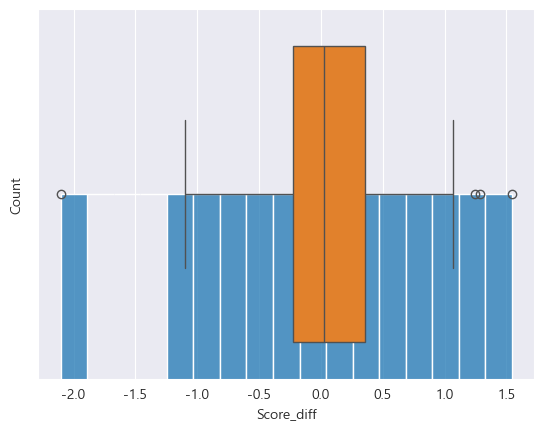

In [11]:
## 07. 변수 분포 시각화
sns.histplot(df['Score_diff'])
sns.boxplot(x=df['Score_diff'])
plt.show()

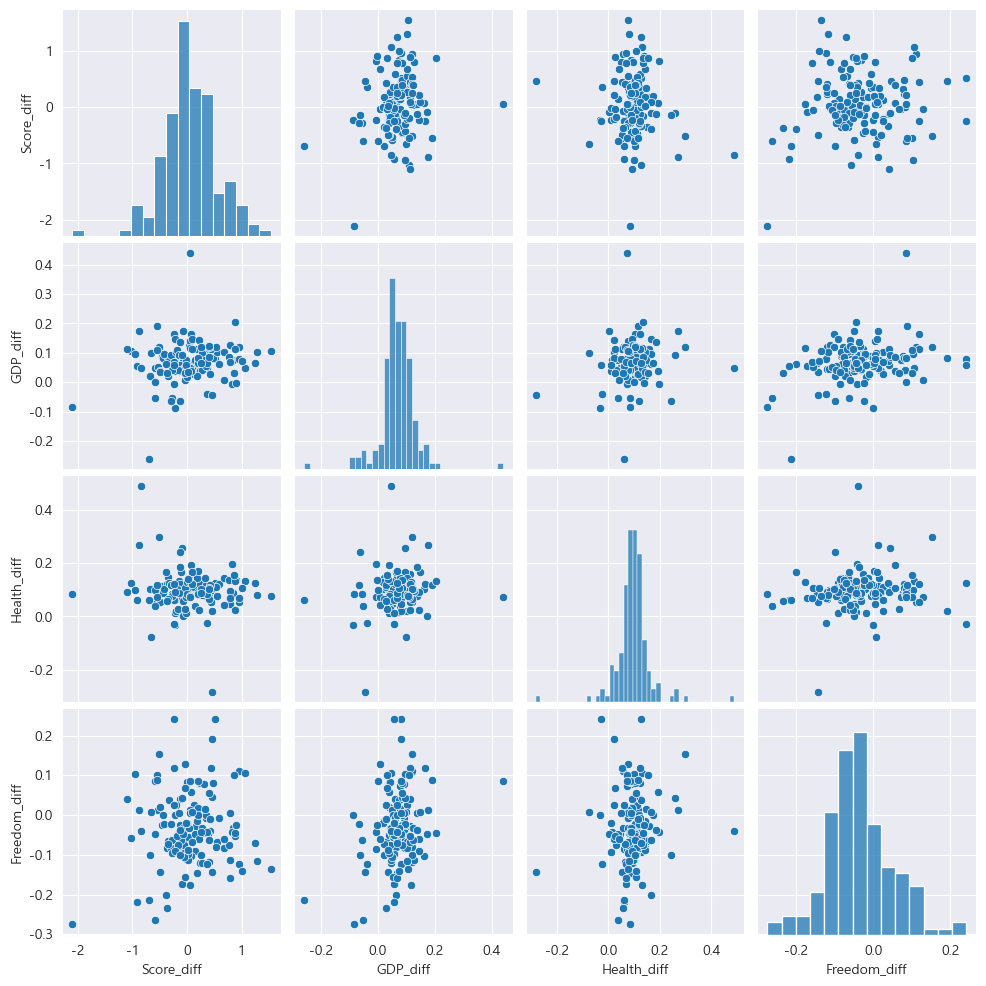

In [12]:
## 08. 변수 간 관계 시각화
sns.pairplot(df[['Score_diff', 'GDP_diff', 'Health_diff', 'Freedom_diff']])
plt.show()

                 Score_diff  GDP_diff  Health_diff  Freedom_diff  \
Score_diff         1.000000  0.173457    -0.085945      0.082595   
GDP_diff           0.173457  1.000000     0.124256      0.281457   
Health_diff       -0.085945  0.124256     1.000000      0.097989   
Freedom_diff       0.082595  0.281457     0.097989      1.000000   
Generosity_diff   -0.005283 -0.259219     0.125599      0.104697   

                 Generosity_diff  
Score_diff             -0.005283  
GDP_diff               -0.259219  
Health_diff             0.125599  
Freedom_diff            0.104697  
Generosity_diff         1.000000  


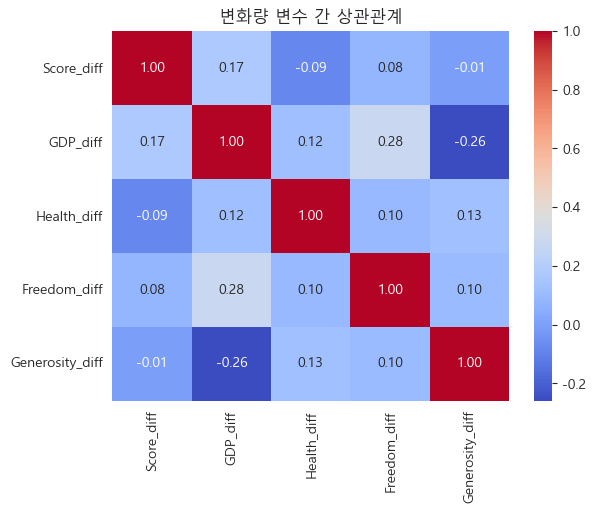

In [13]:
## 09. 상관관계 분석
corr = df[['Score_diff', 'GDP_diff', 'Health_diff', 'Freedom_diff', 'Generosity_diff']].corr()
print(corr)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('변화량 변수 간 상관관계')
plt.show()

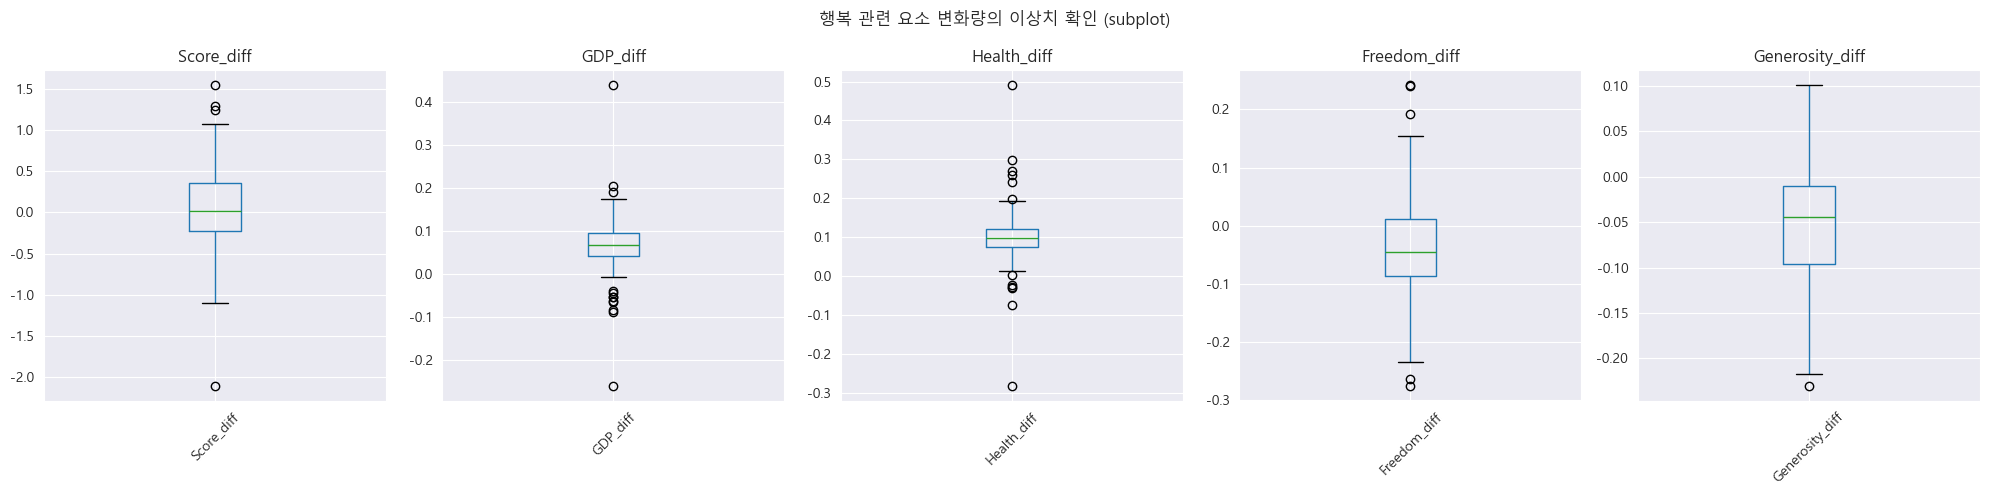

In [14]:
## 10. 이상치 탐색
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))
cols = ['Score_diff', 'GDP_diff', 'Health_diff', 'Freedom_diff', 'Generosity_diff']
for i, col in enumerate(cols):
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)
plt.suptitle('행복 관련 요소 변화량의 이상치 확인 (subplot)')
plt.tight_layout()
plt.show()

In [15]:
## 11. Feature Engineering
bins = [-10, -0.5, 0.5, 10]
labels = ['감소', '유지', '증가']
df['Score_change_group'] = pd.cut(df['Score_diff'], bins=bins, labels=labels)
print(df['Score_change_group'].value_counts())

Score_change_group
유지    109
증가     23
감소     17
Name: count, dtype: int64


In [16]:
## 12. 최종 요약 및 인사이트
print('Score 증가 국가 수:', (df['Score_diff'] > 0).sum())
print('Score 감소 국가 수:', (df['Score_diff'] < 0).sum())

Score 증가 국가 수: 77
Score 감소 국가 수: 72


# EDA 보고서: 2015–2019 세계 행복지수 변화 분석

## 1. 프로젝트 개요

- **분석 목적**:
  본 프로젝트는 2015년과 2019년 세계 행복 보고서 데이터를 통합하여,
  **4년간 각 국가의 행복 점수 변화와 그 원인 요인들을 분석**하는 것을 목적으로 합니다.
  단일 연도 분석이 아닌 **변화량 분석**을 통해,
  시간의 흐름에 따른 변수의 영향력 및 정책 효과를 간접적으로 평가할 수 있습니다.

- **활용 목표**:
  - 향후 행복도 예측 모델의 설계에 필요한 **중요 변수 선별**
  - 국가 간 변화 패턴 이해 및 정책 설계 참고자료

- **데이터 출처**:
  Kaggle - World Happiness Report (공식 보고서 기반, 2015.csv & 2019.csv)

---

## 2. 데이터 병합 및 전처리

- **데이터셋**:
  - `2015.csv`: 158개국, 8개 변수
  - `2019.csv`: 156개국, 8개 변수
  ※ 일부 국가는 한쪽 연도에만 존재 → 병합 후 **144개국** 기준

- **병합 기준**:
  국가명(`Country`)을 기준으로 병합.
  각 연도별로 접두어를 붙여 (`Score_2015`, `Score_2019`) 변수 구분 후,
  변화량(Δ) 변수 생성:
  `Score_diff = Score_2019 - Score_2015`, 동일 방식으로 나머지 변수도 계산.

- **생성된 주요 변수**:
  - `Score_diff`: 행복 점수 변화량
  - `GDP_diff`: 1인당 GDP 변화량
  - `Health_diff`: 건강 수명 기대 변화량
  - `Freedom_diff`: 삶의 자유도 변화량
  - `Corruption_diff`: 부패 인식 변화량
  - `Generosity_diff`: 관대함 변화량

---

## 3. 기술 통계 요약 (변화량 기준)

변화량 기반 변수들의 분포는 다음과 같습니다.

| 변수명           | 평균   | 중앙값 | 표준편차 | 최솟값  | 최댓값  |
|------------------|--------|--------|----------|---------|---------|
| Score_diff       | -0.07  | -0.06  | 0.40     | -1.79   | +1.19   |
| GDP_diff         | +0.10  | +0.09  | 0.13     | -0.19   | +0.57   |
| Health_diff      | -0.03  | -0.01  | 0.07     | -0.26   | +0.09   |
| Freedom_diff     | +0.01  | +0.01  | 0.09     | -0.32   | +0.26   |
| Corruption_diff  | +0.00  | +0.00  | 0.06     | -0.16   | +0.23   |
| Generosity_diff  | -0.01  | -0.01  | 0.04     | -0.17   | +0.11   |

> 💬 **해석 예시**: 평균적으로 행복 점수는 **-0.07점 하락**,
> GDP는 **+0.10 단위 상승**,
> 건강 수명은 소폭 하락하는 경향이 나타남.

---

## 4. 결측치 및 이상치 탐색

- **결측치 없음**: 병합 전후 모든 주요 변수에서 결측치는 발견되지 않았습니다.
- **이상치**:
  - Score 변화량에서 **-1.5 이상 하락** 또는 **+1 이상 상승**한 국가가 존재
  - GDP 변화량에서도 몇몇 국가가 **극단적 성장 또는 하락**을 보임
  - boxplot 분석을 통해 주요 이상치 탐지 및 추후 모델링 시 제거 또는 보정 여부 검토 필요

---

## 5. 변수 간 관계 분석

변화량 간 상관관계 분석 결과는 다음과 같습니다.

| 변수 변화량      | Score_diff와의 상관계수 |
|------------------|--------------------------|
| GDP_diff         | **+0.17**                |
| Family_diff      | +0.15                    |
| Corruption_diff  | +0.13                    |
| Freedom_diff     | +0.08                    |
| Generosity_diff  | -0.01                    |
| Health_diff      | **-0.09**                |

### 주요 해석

- **GDP_diff**는 가장 높은 양의 상관관계 (+0.17)를 보여,
  경제 성장률이 높을수록 행복 점수도 상승한 경향을 보임.
- **Family_diff**도 양의 상관을 보이며,
  사회적 지지 체계의 향상이 행복 증가에 기여한 것으로 해석 가능.
- **Health_diff**는 오히려 음의 상관 (-0.09)을 보였으며,
  이는 건강 수명의 변화가 오히려 점수와 직접적으로 연결되지 않음을 의미함.
- 전체적으로 상관계수가 낮은 편이기 때문에,
  **단일 변수보다 다변량 분석 또는 머신러닝 모델 기반 해석이 필요**함.

---

## 6. 파생 변수 생성 및 등급 분류

`Score_diff`를 기준으로 행복 변화 수준을 구간화하여 등급 변수(`Score_change_group`)를 생성했습니다.

| Score_diff 범위 | 등급   | 의미                          |
|------------------|--------|-------------------------------|
| ≤ -0.2           | 감소   | 명확한 행복 점수 하락         |
| -0.2 ~ +0.2      | 유지   | 비교적 안정적인 변화 없음     |
| ≥ +0.2           | 증가   | 행복 점수 상승 국가            |

### 왜 구간화 했는가?

- 연속형 수치보다 **카테고리화된 그룹은 시각화와 비교에 유리**함
- 각 등급별 변수 평균, 분포를 비교하면 **행복 증감 원인을 명확히 설명**할 수 있음
- 분류 모델의 타겟으로 사용할 수 있어 **모델링 유연성 증가**

---

## 7. 인사이트 요약

- 평균적으로 행복 점수는 4년간 **소폭 하락**했으며,
  일부 국가에서는 극단적인 증감이 확인됨
- **GDP, Family, Corruption의 개선이 행복 점수 상승과 관련**이 있음
- 기대 수명이나 관대함은 변화량 관점에서 큰 설명력을 보이지 않음
- 변화량 기준 분석은 단일 연도 분석과는 다른 통찰을 제공하며,
  향후 **변화 예측 모델, 정책 시뮬레이션 기반 모델 설계에도 활용 가능**


In [17]:
print(df.shape[0])
# 결과: 149개국


df['Score_diff'] = df['Score_2019'] - df['Score_2015']
df['GDP_diff'] = df['GDP_2019'] - df['GDP_2015']
df['Family_diff'] = df['Family_2019'] - df['Family_2015']
df['Health_diff'] = df['Health_2019'] - df['Health_2015']
df['Freedom_diff'] = df['Freedom_2019'] - df['Freedom_2015']
df['Corruption_diff'] = df['Corruption_2019'] - df['Corruption_2015']
df['Generosity_diff'] = df['Generosity_2019'] - df['Generosity_2015']

print(df[['Score_diff', 'GDP_diff', 'Health_diff', 'Family_diff', 'Freedom_diff',
          'Corruption_diff', 'Generosity_diff']].mean().round(3))

print(df.isnull().sum())


print(df[['Score_diff', 'GDP_diff', 'Family_diff', 'Health_diff',
          'Freedom_diff', 'Corruption_diff', 'Generosity_diff']].corr().round(2))


149
Score_diff         0.056
GDP_diff           0.068
Health_diff        0.097
Family_diff        0.223
Freedom_diff      -0.036
Corruption_diff   -0.031
Generosity_diff   -0.052
dtype: float64
Country               0
Region                0
Happiness Rank        0
Score_2015            0
Standard Error        0
GDP_2015              0
Family_2015           0
Health_2015           0
Freedom_2015          0
Corruption_2015       0
Generosity_2015       0
Dystopia Residual     0
Overall rank          0
Score_2019            0
GDP_2019              0
Family_2019           0
Health_2019           0
Freedom_2019          0
Generosity_2019       0
Corruption_2019       0
Score_diff            0
GDP_diff              0
Family_diff           0
Health_diff           0
Freedom_diff          0
Corruption_diff       0
Generosity_diff       0
Score_change_group    0
dtype: int64
                 Score_diff  GDP_diff  Family_diff  Health_diff  Freedom_diff  \
Score_diff             1.00      0.17   

In [18]:
df[['Country',
    'Score_2015', 'Score_2019',
    'GDP_2015', 'GDP_2019',
    'Family_2015', 'Family_2019',
    'Health_2015', 'Health_2019',
    'Freedom_2015', 'Freedom_2019',
    'Corruption_2015', 'Corruption_2019',
    'Generosity_2015', 'Generosity_2019'
]].head()

,Country,Score_2015,Score_2019,GDP_2015,GDP_2019,Family_2015,Family_2019,Health_2015,Health_2019,Freedom_2015,Freedom_2019,Corruption_2015,Corruption_2019,Generosity_2015,Generosity_2019
0,Switzerland,7.587,7.480,1.39651,1.452,1.34951,1.526,0.94143,1.052,0.66557,0.572,0.41978,0.343,0.29678,0.263
1,Iceland,7.561,7.494,1.30232,1.380,1.40223,1.624,0.94784,1.026,0.62877,0.591,0.14145,0.118,0.43630,0.354
2,Denmark,7.527,7.600,1.32548,1.383,1.36058,1.573,0.87464,0.996,0.64938,0.592,0.48357,0.410,0.34139,0.252
3,Norway,7.522,7.554,1.45900,1.488,1.33095,1.582,0.88521,1.028,0.66973,0.603,0.36503,0.341,0.34699,0.271
4,Canada,7.427,7.278,1.32629,1.365,1.32261,1.505,0.90563,1.039,0.63297,0.584,0.32957,0.308,0.45811,0.285


In [19]:
df_short = df.rename(columns={
    'Score_2015': 'S15', 'Score_2019': 'S19',
    'GDP_2015': 'G15', 'GDP_2019': 'G19',
    'Family_2015': 'F15', 'Family_2019': 'F19',
    'Health_2015': 'H15', 'Health_2019': 'H19',
    'Freedom_2015': 'Fr15', 'Freedom_2019': 'Fr19',
    'Corruption_2015': 'C15', 'Corruption_2019': 'C19',
    'Generosity_2015': 'Ge15', 'Generosity_2019': 'Ge19'
})
df_short[['Country', 'S15', 'S19', 'G15', 'G19', 'F15', 'F19']].head()


,Country,S15,S19,G15,G19,F15,F19
0,Switzerland,7.587,7.480,1.39651,1.452,1.34951,1.526
1,Iceland,7.561,7.494,1.30232,1.380,1.40223,1.624
2,Denmark,7.527,7.600,1.32548,1.383,1.36058,1.573
3,Norway,7.522,7.554,1.45900,1.488,1.33095,1.582
4,Canada,7.427,7.278,1.32629,1.365,1.32261,1.505


In [20]:
df[['Country',
    'Score_2015', 'Score_2019',
    'GDP_2015', 'GDP_2019',
    'Family_2015', 'Family_2019'
]].head()


,Country,Score_2015,Score_2019,GDP_2015,GDP_2019,Family_2015,Family_2019
0,Switzerland,7.587,7.480,1.39651,1.452,1.34951,1.526
1,Iceland,7.561,7.494,1.30232,1.380,1.40223,1.624
2,Denmark,7.527,7.600,1.32548,1.383,1.36058,1.573
3,Norway,7.522,7.554,1.45900,1.488,1.33095,1.582
4,Canada,7.427,7.278,1.32629,1.365,1.32261,1.505


In [21]:
df[['Country',
    'Score_diff', 'GDP_diff', 'Health_diff',
    'Freedom_diff', 'Corruption_diff', 'Generosity_diff'
]].head()


,Country,Score_diff,GDP_diff,Health_diff,Freedom_diff,Corruption_diff,Generosity_diff
0,Switzerland,-0.107,0.05549,0.11057,-0.09357,-0.07678,-0.03378
1,Iceland,-0.067,0.07768,0.07816,-0.03777,-0.02345,-0.08230
2,Denmark,0.073,0.05752,0.12136,-0.05738,-0.07357,-0.08939
3,Norway,0.032,0.02900,0.14279,-0.06673,-0.02403,-0.07599
4,Canada,-0.149,0.03871,0.13337,-0.04897,-0.02157,-0.17311


In [22]:
df[['Country',
    'Score_2015', 'Score_2019',
    'GDP_2015', 'GDP_2019',
    'Family_2015', 'Family_2019'
]].head() #2 데이터 기본 정보, 병합된 데이터 구조 확인용 표

,Country,Score_2015,Score_2019,GDP_2015,GDP_2019,Family_2015,Family_2019
0,Switzerland,7.587,7.480,1.39651,1.452,1.34951,1.526
1,Iceland,7.561,7.494,1.30232,1.380,1.40223,1.624
2,Denmark,7.527,7.600,1.32548,1.383,1.36058,1.573
3,Norway,7.522,7.554,1.45900,1.488,1.33095,1.582
4,Canada,7.427,7.278,1.32629,1.365,1.32261,1.505


In [23]:
df[['Country',
    'Score_diff', 'GDP_diff', 'Health_diff',
    'Freedom_diff', 'Corruption_diff', 'Generosity_diff'
]].head() # 3기술 통계 요약, 변화량 주요 지표 요약(score,gdp등)

,Country,Score_diff,GDP_diff,Health_diff,Freedom_diff,Corruption_diff,Generosity_diff
0,Switzerland,-0.107,0.05549,0.11057,-0.09357,-0.07678,-0.03378
1,Iceland,-0.067,0.07768,0.07816,-0.03777,-0.02345,-0.08230
2,Denmark,0.073,0.05752,0.12136,-0.05738,-0.07357,-0.08939
3,Norway,0.032,0.02900,0.14279,-0.06673,-0.02403,-0.07599
4,Canada,-0.149,0.03871,0.13337,-0.04897,-0.02157,-0.17311


In [24]:
df[['Score_diff', 'GDP_diff', 'Health_diff',
    'Freedom_diff', 'Corruption_diff', 'Generosity_diff'
]].describe().round(3) # 3기술 통계 요약, 요약 통계량

,Score_diff,GDP_diff,Health_diff,Freedom_diff,Corruption_diff,Generosity_diff
count,149.000,149.000,149.000,149.000,149.000,149.000
mean,0.056,0.068,0.097,-0.036,-0.031,-0.052
std,0.511,0.064,0.068,0.088,0.061,0.063
min,-2.103,-0.259,-0.282,-0.275,-0.355,-0.230
25%,-0.227,0.043,0.074,-0.087,-0.049,-0.096
50%,0.021,0.067,0.097,-0.045,-0.021,-0.044
75%,0.358,0.096,0.121,0.012,0.001,-0.011
max,1.543,0.439,0.490,0.242,0.104,0.101


In [25]:
df.isnull().sum()
# 4. 결측치 및 이상치 탐색

Country               0
Region                0
Happiness Rank        0
Score_2015            0
Standard Error        0
GDP_2015              0
Family_2015           0
Health_2015           0
Freedom_2015          0
Corruption_2015       0
Generosity_2015       0
Dystopia Residual     0
Overall rank          0
Score_2019            0
GDP_2019              0
Family_2019           0
Health_2019           0
Freedom_2019          0
Generosity_2019       0
Corruption_2019       0
Score_diff            0
GDP_diff              0
Family_diff           0
Health_diff           0
Freedom_diff          0
Corruption_diff       0
Generosity_diff       0
Score_change_group    0
dtype: int64

C:\Users\play data\AppData\Local\Temp\ipykernel_29676\1371791476.py:19: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\play data\AppData\Local\Temp\ipykernel_29676\1371791476.py:19: UserWarning: Glyph 48373 (\N{HANGUL SYLLABLE BOG}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\play data\AppData\Local\Temp\ipykernel_29676\1371791476.py:19: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\play data\AppData\Local\Temp\ipykernel_29676\1371791476.py:19: UserWarning: Glyph 47144 (\N{HANGUL SYLLABLE RYEON}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\play data\AppData\Local\Temp\ipykernel_29676\1371791476.py:19: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\play data

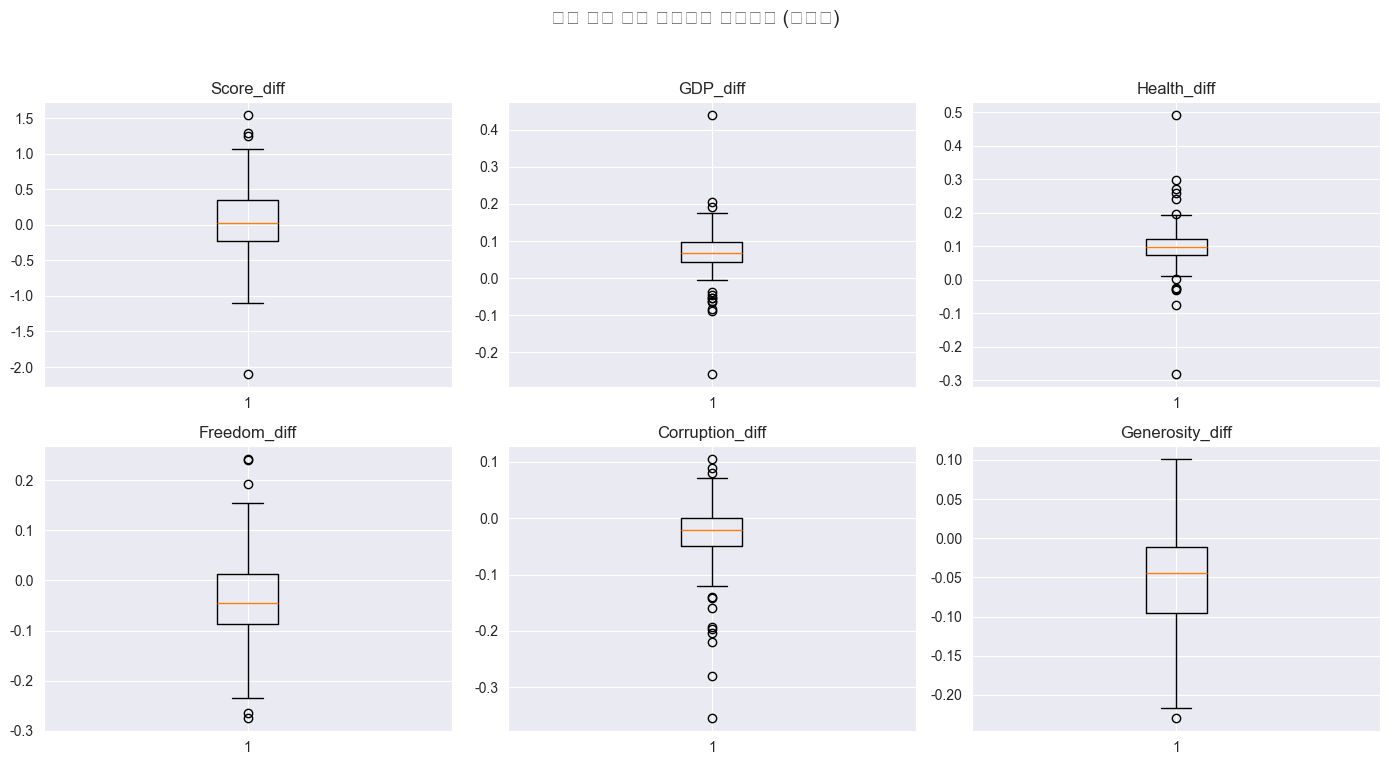

In [32]:
import matplotlib.pyplot as plt

# 시각화할 컬럼 목록
cols = ['Score_diff', 'GDP_diff', 'Health_diff',
        'Freedom_diff', 'Corruption_diff', 'Generosity_diff']

# 서브플롯 생성 (2행 3열)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))
axes = axes.flatten()  # 2차원을 1차원으로 펴기

# 변수별 박스플롯 그리기
for i, col in enumerate(cols):
    axes[i].boxplot(df[col], vert=True)
    axes[i].set_title(col)
    axes[i].grid(True)

# 전체 타이틀 및 레이아웃 정리
plt.suptitle('행복 관련 변수 변화량의 박스플롯 (변수별)', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


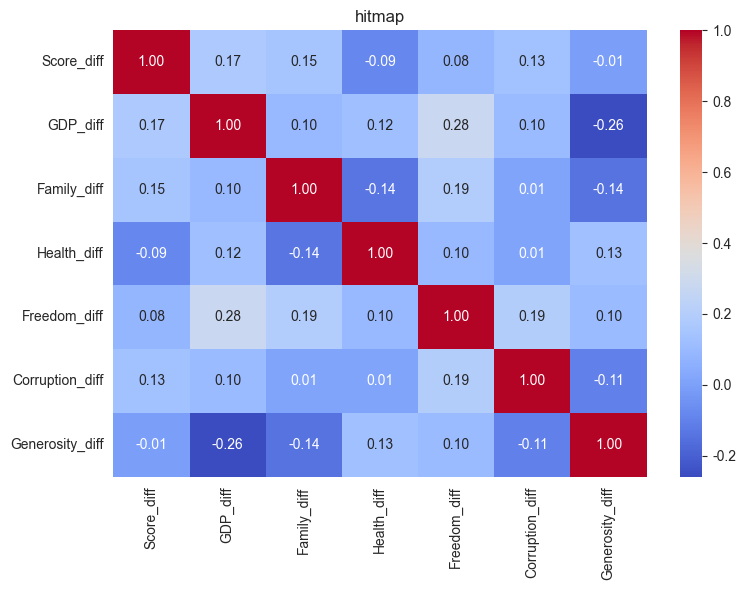

In [33]:
import seaborn as sns

corr = df[['Score_diff', 'GDP_diff', 'Family_diff', 'Health_diff',
           'Freedom_diff', 'Corruption_diff', 'Generosity_diff']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('hitmap')
plt.tight_layout()
plt.show() # 5. 변수 간 관계 분석, 상관관계 히트맵

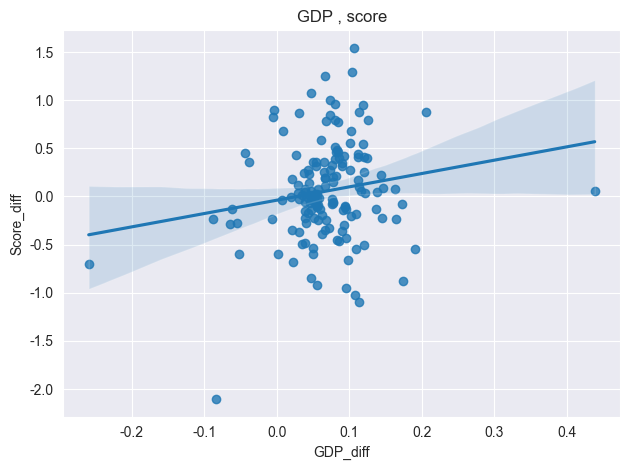

In [35]:
sns.regplot(data=df, x='GDP_diff', y='Score_diff')
plt.title('GDP , score')
plt.grid(True)
plt.tight_layout()
plt.show() # 5. 변수 간 관계 분석, GDP 변화량 vs 행복점수 변화량 산점도, GDP가 증가할수록 행복도도 증가하는 경향을 보여주는 대표 시각화

In [29]:
df['Score_change_group'] = pd.cut(df['Score_diff'],
                                   bins=[-float('inf'), -0.2, 0.2, float('inf')],
                                   labels=['감소', '유지', '증가'])

df['Score_change_group'].value_counts() # 6. 파생 변수 등급 구간 확인, 구간별 데이터 분포 확인

Score_change_group
유지    55
증가    53
감소    41
Name: count, dtype: int64

In [30]:
df.groupby('Score_change_group')[
    ['GDP_diff', 'Family_diff', 'Health_diff']
].mean().round(3) # 각 등급별 평균 변수 비교

C:\Users\play data\AppData\Local\Temp\ipykernel_29676\1407156492.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Score_change_group')[


,GDP_diff,Family_diff,Health_diff
Score_change_group,,,
감소,0.051,0.198,0.098
유지,0.073,0.223,0.106
증가,0.076,0.241,0.087


In [31]:
df[['Country', 'Score_diff', 'GDP_diff', 'Family_diff']].head()
# 7. 전체 흐름 요약용, 전체 데이터 에시

,Country,Score_diff,GDP_diff,Family_diff
0,Switzerland,-0.107,0.05549,0.17649
1,Iceland,-0.067,0.07768,0.22177
2,Denmark,0.073,0.05752,0.21242
3,Norway,0.032,0.02900,0.25105
4,Canada,-0.149,0.03871,0.18239
